# **Alberto Fontalvo**

# **DESCRIPCIÓN DEL DATASET:**

**DOI 10.24432/C51307**

Este estudio examinó la evaluación de los requisitos de carga de calefacción de los edificios (es decir, eficiencia energética) en función de los parámetros del edificio.


Realizamos análisis energéticos utilizando 12 formas de edificios diferentes simuladas en Ecotect. Los edificios se diferencian en cuanto a la superficie acristalada, la distribución del área acristalada y la orientación, entre otros parámetros. Simulamos varios escenarios en función de las características antes mencionadas para obtener 768 formas de edificios. El conjunto de datos comprende 768 muestras y 8 características, con el objetivo de predecir dos respuestas con valor real. También se puede utilizar como un problema de clasificación de clases múltiples si la respuesta se redondea al entero más cercano.


**Específicamente:**

Compacidad relativa X1

Área de superficie X2

Área de pared X3

Área del techo X4

Altura total X5

Orientación X6

Área de acristalamiento X7

Distribución del área de acristalamiento X8

y1 Carga de calefacción








# **Librerías**

In [9]:
#!pip install pandas-profiling

import pandas as pd
import numpy as np
import seaborn as sns # librería para gráficos estadisticos mas especializados
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split #División del dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #Métricas
from pandas_profiling import ProfileReport

# **CARGO DATASET**

In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
dataset=pd.read_excel("/content/drive/MyDrive/Herramientas_Matematicas_IA/ENB2012_data.xlsx")
dataset.head()

Mounted at /content/drive


X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84

# **ANÁLISIS EXPLORATORIO DE DATOS**

In [13]:
profile = ProfileReport(dataset)
profile.to_file("report.html")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Correlación:**

*   Respecto a la salida **y1** (CARGA DE CALEFACCIÓN), presentan una fuerte correlación positiva el parámetros **x5**
 una fuerte correlación negativa el parametro **x2**.

*   La salida **y1** presenta correlación negativa  medianamente fuerte con el parametro **x2**. El mismo nivel de correlación en postivo con **x1**
*   Los parámetros **x1** y **x2**, presentan una fuerte corelación negativa.
*   El parámetro **x4** presenta una fuerte correlación positiva con el parámetro **x5**.
*   El parámetro **X7** presenta fuerte correlación positva, por lo tanto sera tomada en cuenta para la evualuación del modelo
*   Por lo anterior, se tendran en cuenta los parámetros **x1**, **x4** y **x5** para predecir la salida **y1**.








# **NORMALIZACIÓN DE DATOS**

In [40]:
x=np.column_stack((dataset['X1'], dataset['X2'], dataset['X4'], dataset['X5'], dataset['X7']))
y=dataset['Y1']
dataset.tail(4)

X1     X2     X3     X4   X5  X6   X7  X8     Y1
764  0.62  808.5  367.5  220.5  3.5   2  0.4   5  16.54
765  0.62  808.5  367.5  220.5  3.5   3  0.4   5  16.44
766  0.62  808.5  367.5  220.5  3.5   4  0.4   5  16.48
767  0.62  808.5  367.5  220.5  3.5   5  0.4   5  16.64

In [41]:
#Ajuste y transformación de los datos en un rango
scaler=MinMaxScaler()
#scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 0., 1.]])

# **SEPARACIÓN DEL DATASET PARA ENTRENAMIENTO Y PRUEBA**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape

((614, 5), (154, 5))

# **OLS**

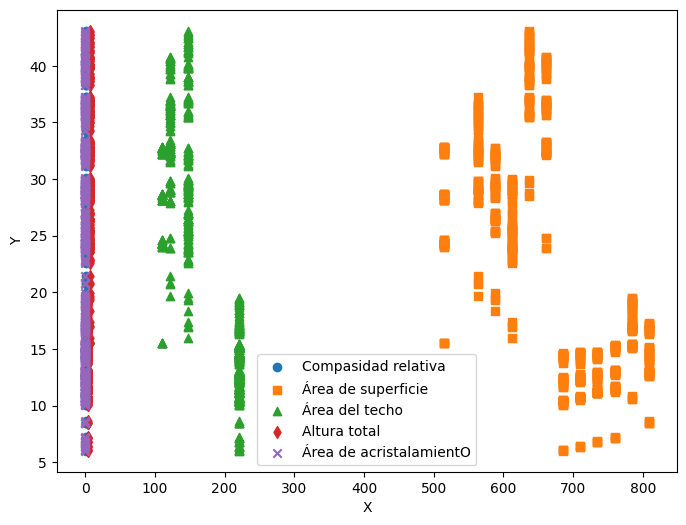

In [21]:
columnas_a_trazar = [('X1', 'Compasidad relativa'), ('X2', 'Área de superficie'), ('X4', 'Área del techo'),
 ('X5', 'Altura total'), ('X7','Área de acristalamientO')]
# Estilo de marcadores y colores para cada conjunto de datos
estilo = ['o', 's', '^', 'd', 'x']
colores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 6))

for columna, etiqueta in columnas_a_trazar:
    plt.scatter(dataset[columna], y, label=etiqueta, marker=estilo.pop(0))

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# **DEFINICIÓN DEL REGRESOR**

In [22]:
x_reg=np.ones_like(x)
x_reg

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

# **CONCATENACIÓN VERTICAL**

Valido el modelo, luego implemento SKLEARN

In [23]:
x_reg=np.c_[x_reg,x]
print("Tamaño de x_reg: ",x_reg.shape)
print("\n")
x_reg

Tamaño de x_reg:  (768, 10)




array([[  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
       [  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
       [  1.  ,   1.  ,   1.  , ..., 110.25,   7.  ,   0.  ],
       ...,
       [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ],
       [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ],
       [  1.  ,   1.  ,   1.  , ..., 220.5 ,   3.5 ,   0.4 ]])

In [59]:
y = dataset['Y1'].values
x = dataset[['X1', 'X2', 'X4', 'X5', 'X7']].values

# Agrego sesgo
x_reg = np.c_[np.ones_like(y), x]


#theta(0) es el sesgo
theta = np.dot(np.dot(np.linalg.inv(np.dot(x_reg.T, x_reg)), x_reg.T), y)
theta

array([ 8.43864711e+01, -6.47734319e+01, -2.64761432e-02, -1.21626451e-01,
        4.16995371e+00,  2.04379683e+01])

Predicción del modelo

In [60]:
y_pred = np.dot(x_reg, theta)
y_pred.shape

(768,)

Gráfico


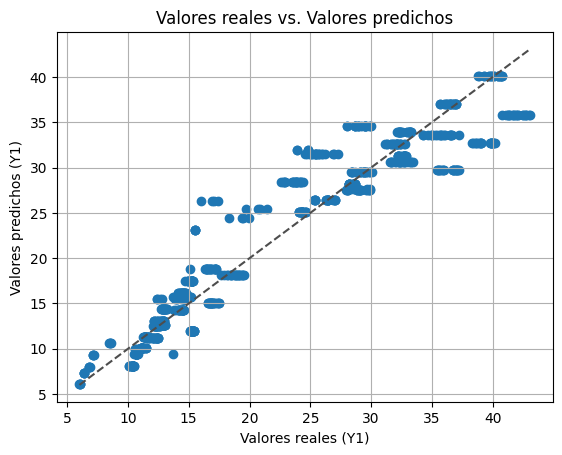

In [63]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)

ax.set_xlabel('Valores reales (Y1)')
ax.set_ylabel('Valores predichos (Y1)')
ax.set_title('Valores reales vs. Valores predichos')
ax.plot([min(y), max(y)], [min(y), max(y)], ls="--", c=".3")

plt.grid(True)
plt.show()

# **Scikit-learn (LinearRegression)**

In [86]:
reg=LinearRegression().fit(x,y)

coeficientes = reg.coef_
intercepcion = reg.intercept_

print("Intercepto: ",intercepcion)
print("\nCoeficientes: \n")
for i, valor in enumerate(reg.coef_.T):
  print(f"theta_{i+1} = {valor}")

Intercepto:  84.38647107746262

Coeficientes: 

theta_1 = -64.77343189110478
theta_2 = -0.026476143247856715
theta_3 = -0.12162645077225714
theta_4 = 4.169953711294829
theta_5 = 20.437968319559225


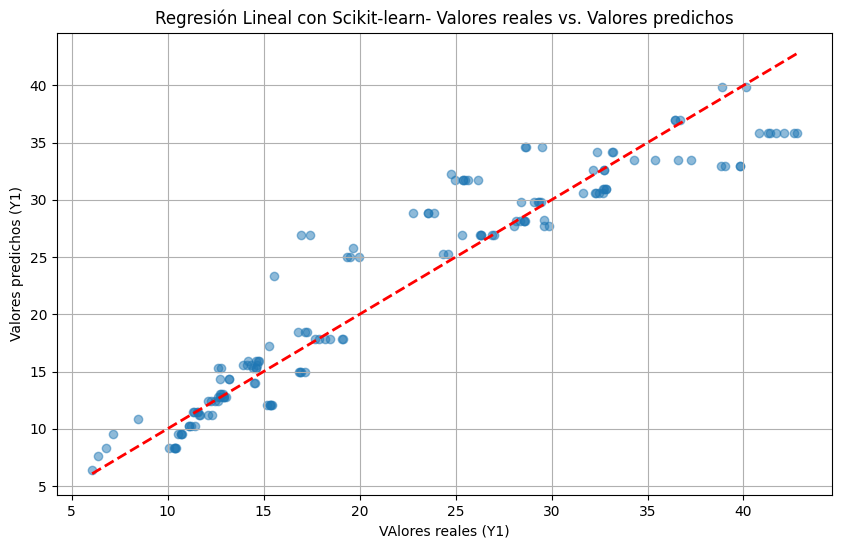

In [29]:
model = LinearRegression()
# Entrenar el modelo en los datos de entrenamiento
model.fit(x_train, y_train)

# Calcular las predicciones en los datos de prueba
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('VAlores reales (Y1)')
plt.ylabel('Valores predichos (Y1)')
plt.title('Regresión Lineal con Scikit-learn- Valores reales vs. Valores predichos')
plt.grid(True)
plt.show()

# **Error de predición con OLS**

**MSE de entrenamiento y de validación**

In [49]:
#MSE de entrenamiento
y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)

#MSE de Validación
mse_test = mean_squared_error(y_test, y_pred)

print("MSE de validación =", mse_test)
print("MSE de entrenamiento =", mse_train)

MSE de validación = 9.982389709293946
MSE de entrenamiento = 8.33239231101359


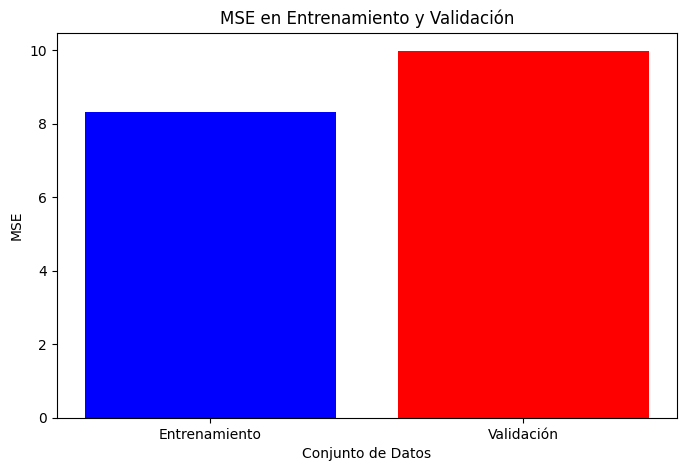

In [50]:
# Etiquetas para las barras
labels = ['Entrenamiento', 'Validación']
# Valores de MSE correspondientes
mse_values = [mse_train, mse_test]

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color=['blue', 'red'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('MSE')
plt.title('MSE en Entrenamiento y Validación')
plt.show()


**Interpretación MSE entrenamiento y MSE validación:**

**MSE validación:** de los datos independientes, es decir, de los que no se utilizaron en el entrenamiento del modelo, obtuvo 9.98 unidades en relación con los datos de validación.


**MSE entrenamiento:** valor de los datos que fueron entrenados. Este error cuadratico medio indica que el modelo entrenado tuvo 8.33 unidades en relación con los valores reales tomados para entrenamiento.


El modelo presenta un buen rendimento en ajustarse a los datos y en predicciones precisas.

**RMSE de entrenamiento y validación**

In [53]:
#RMSE entrenamiento
rmse_train = np.sqrt(mse_train)
print("RMSE entrenamiento =", rmse_train)

#RMSE validación
rmse_test = np.sqrt(mse_test)
print("RMSE validación =", rmse_test)

RMSE entrenamiento = 2.8865883514996713
RMSE validación = 3.159492001777176


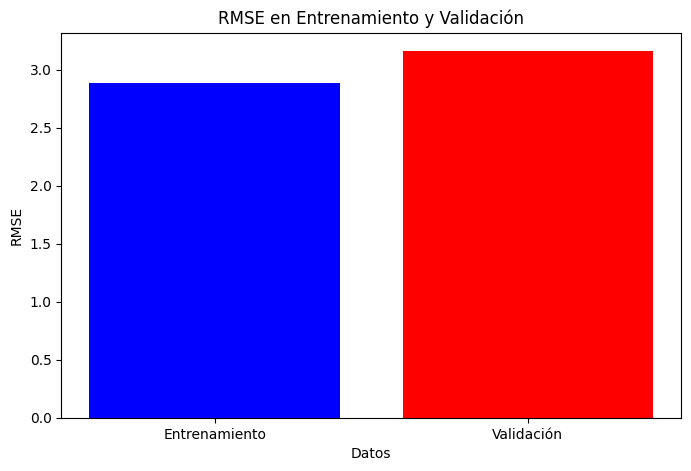

In [66]:
labels = ['Entrenamiento', 'Validación']
rmse_values = [rmse_train, rmse_test]

plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.xlabel('Datos')
plt.ylabel('RMSE')
plt.title('RMSE en Entrenamiento y Validación')
plt.show()

**Interpretación RMSE en entrenmaiento y validación**

**RMSE entrenamiento** = 2.8865883514996713

**RMSE validación** = 3.159492001777176

Los valores obtenidos son bajos y similares, lo que demuestra un buen rendimiento del modelo en predecir con los datos utilizados junto con los que no ha visto antes.

**R2 en entrenamiento y validación**

In [76]:
#R2
r_squared_train = r2_score(y_train, y_train_pred)
print("R^2 en entrenamiento =", r_squared_train)

r_squared_test = r2_score(y_test, y_test)
print("R^2 de validación =", r_squared_test)

R^2 en entrenamiento = 0.9185351513169778
R^2 de validación = 1.0


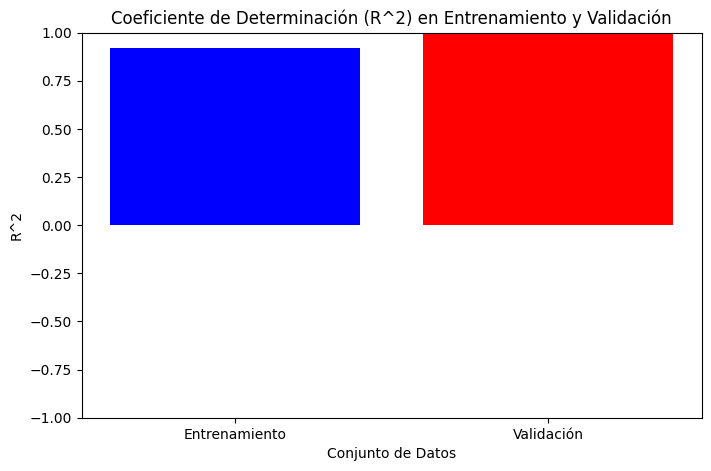

In [77]:
labels = ['Entrenamiento', 'Validación']
r2_values = [r_squared_train, r_squared_test]

plt.figure(figsize=(8, 5))
plt.bar(labels, r2_values, color=['blue', 'red'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('R^2')
plt.title('Coeficiente de Determinación (R^2) en Entrenamiento y Validación')
plt.ylim([-1, 1])
plt.show()

**Interpretación R2**

**R^2 en entrenamiento** = 0.9185351513169778

**R^2 de validación** = 1.0

R2 de validación, muestra que el modelo explica la variabilidad en los datos de prueba de manera perfecta.

El valor de R2 de entrenamiento permite interpretar que tiende a ser muy similar al R2 de validación.

Nota: R2 de validación =1, puede presentar la posibilidad de sobreajuste.

**MAE**

In [145]:
#MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE de entrenamiento =", mae_train)

y_pred = model.predict(x_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("MAE de validación =", mae_test)

MAE de entrenamiento = 2.023444402141873
MAE de validación = 2.191819455350331


**MAE de entrenamiento**= 2.023444402141873

**MAE de validación** = 2.191819455350331


Los valores bajos y similares de MAE en la regresión OLS indica que el modelo con alto nivel de acierto los valores del modelo y reales.

# **GRADIENTE DESCENDENTE**

In [78]:
def gradiente_descendente(thetaG, x, y):

  #y_gorro=y_estimado, es decir un valor inicial, pendiente inicial e intercepto inicial
  y_gorro=x.dot(thetaG).flatten()

  #Hallo el error cuadratico medio MSE
  error=(y-y_gorro)
  mse=(1.0 / len(x))*np.sum(np.square(error))

  #Gradiente
  gradiente=-(2.0 / len(x))*error.dot(x)

  return gradiente, mse

**DEFINICIÓN DE PUNTOS DE INICIO E HIPER PARÁMETROS**

In [93]:
#SON 5 PARÁMETROS, SON 4 VALORES EN thetaG
thetaG=np.array((-40, -40, -40, -40, -40))

#TASA DE APRENDIZAJE
alpha=.1
n_iteraciones=100

#TOLERANCA PARA QUE EL MÉTODO SEA COMPUTACIONALMENTE EFICIENTE
tolerancia=1e-3

#Condiciones iniciales aleatorias
theta_GD = np.random.randn(x_train.shape[1] + 1)
print("Condiciones iniciales aleatorias: \n",theta_GD)

#GARDAR VALORES ANTERIORES
old_thetaG=[]
errors=[]

Condiciones iniciales aleatorias: 
 [ 0.80236225 -0.08560715  1.69293061 -0.94117711  0.94135408 -1.31542198]


**Regresor para entrenamiento**

In [98]:
Regresor_GD_train = np.c_[np.ones((x_train.shape[0])),x_train]
print(Regresor_GD_train.shape)

(614, 6)


**CALCULO DEL GRADIENTE**

In [101]:
iteraciones = 1
for i in range(n_iteraciones):
    gradiente, error = gradiente_descendente(thetaG, X_scaled, y)
    new_thetaG = thetaG - alpha * gradiente

    # Cada 4 iteraciones imprime
    if iteraciones % 8 == 0:
        print("Iteraciones: %d - Error: %.4f" % (iteraciones, error))
        old_thetaG.append(new_thetaG)
        errors.append(errors)

    # Condiciones de parada
    if np.sum(abs(new_thetaG - thetaG)) < tolerancia:
        print('Gradiente descendente convergió')
        break

    iteraciones += 1
    thetaG = new_thetaG

print('\nthetaG = ', thetaG)
print("\nGradiente: ", gradiente)

Iteraciones: 8 - Error: 11.2679
Iteraciones: 16 - Error: 11.0749
Iteraciones: 24 - Error: 10.9087
Iteraciones: 32 - Error: 10.7647
Iteraciones: 40 - Error: 10.6394
Iteraciones: 48 - Error: 10.5296
Iteraciones: 56 - Error: 10.4330
Iteraciones: 64 - Error: 10.3477
Iteraciones: 72 - Error: 10.2721
Iteraciones: 80 - Error: 10.2047
Iteraciones: 88 - Error: 10.1446
Iteraciones: 96 - Error: 10.0906

thetaG =  [-1.1952752   8.62289571  1.66776676 24.20585046  8.5818826 ]

Gradiente:  [ 0.10881975 -0.17454811  0.10100984 -0.07665579  0.04418147]


**Datos de entrenamiento Gradiente Descendente**

In [100]:
y_pred_train_gd = X_scaled.dot(thetaG)
y_pred_train_gd.shape

(768,)

**Datos de prueba**

In [109]:
Regresor_GD_test = np.c_[np.ones((x_test.shape[0],1)),x_test]
print(Regresor_GD_test.shape)
y_pred_test_gd = Regresor_GD_test.dot(theta_GD)

(154, 6)


KeyboardInterrupt: ignored

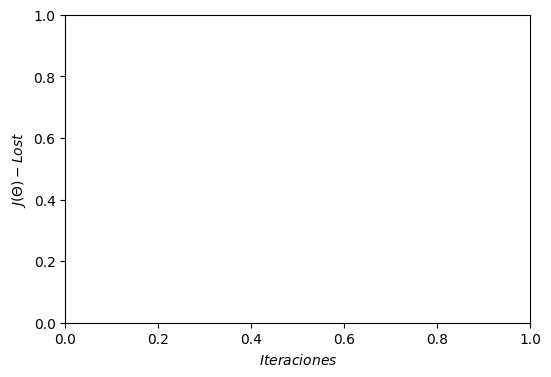

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('$J(\Theta) - Lost$')
ax.set_xlabel('$Iteraciones$')
_=ax.plot(range(iteraciones),errors,'b')
plt.show()

# **MÉTRICAS**


# **Datos de validación**

In [137]:
mse_test = mean_squared_error(y_test, y_pred_test_gd)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test, y_pred_test_gd)
print("MSE validación=", mse_test)
print("RMSE validación=", rmse_test)
print("R2 validación=",r_squared_test)

MSE validación= 540.5794528766185
RMSE validación= 23.250364575133407
R2 validación= -4.455061405443763


# **Datos de entrenamiento**

In [136]:
model.fit(x_train, y_train)
y_pred_train_gd = model.predict(x_train)

if len(y_train) == len(y_pred_train_gd):
    mse_train = mean_squared_error(y_train, y_pred_train_gd)
    rmse_train = np.sqrt(mse_train)
    r_squared_train = r2_score(y_train, y_pred_train_gd)

    print("MSE en entrenamiento=", mse_train)
    print("RMSE en entrenamiento=", rmse_train)
    print("R2 en entrenamiento=", r_squared_train)
else:
    print("Ajuste las dimensiones")

MSE en entrenamiento= 8.33239231101359
RMSE en entrenamiento= 2.8865883514996713
R2 en entrenamiento= 0.9185351513169778


# **INTERPRETACIÓN DE METRICAS EN GRADIENTE DESCENDENTE**

**MSE en entrenamiento:** 8.33239231101359

**MSE validación:**540.5794528766185

El modelo presenta sobreajuste por la gran diferencia de uniddes entre el MSE de prueba y de entrenamiento.

**RMSE en entrenamiento:**2.8865883514996713 - un valor bajo, indica que el modelo con los datos de entrenamiento se ajusta bien.


**RMSE en validación:**540.5794528766185 - el modelo con datos de prueba tiene una diferencia de unidades significativa con el entrenamiento, lo que indica un sobre ajuste en esta regresión.

**R2 en entrenamiento:** R2 en entrenamiento= 0.9185351513169778 - valor cercano a 1, indica que el modelo interpreta de manera excelente la variabilidad de los datos.

**R2 en validación:**R2 validación= -4.455061405443763 - presenta un error gigante en la interpretación de los datos.

**MAE**



In [148]:
mae_test = mean_absolute_error(y_test, y_pred_test_gd)
print("MAE de validación =", mae_test)

mae_train = mean_absolute_error(y_train, y_pred_train_gd)
print("MAE en entrenamiento =", mae_train)

MAE de validación = 21.09658190086151
MAE en entrenamiento = 2.023444402141873


MAE bajo en entrenamiento indica que el modelo hace prediciones bastantes precisas.

MAE con diferencia significativa con respecto al el MAE de entrenamiento indica un pesimo rendimiento del modelo.